### 1. Data Preparation

In this step, we will load the dataset into our preferred data analysis environment. For this example, we'll use Python with the Pandas and NumPy libraries. We will also inspect the dataset to understand its structure.
### 2. Exploratory Data Analysis (EDA)

We will perform exploratory data analysis to understand the structure of the dataset. This includes checking for missing values, outliers, and inconsistencies, as well as visualizing the distribution of features.
### 3. Feature Engineering

In this step, we will perform feature engineering, which may involve encoding categorical variables, scaling numerical features, or handling missing values.


First few rows of the dataset:
   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  

Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
--

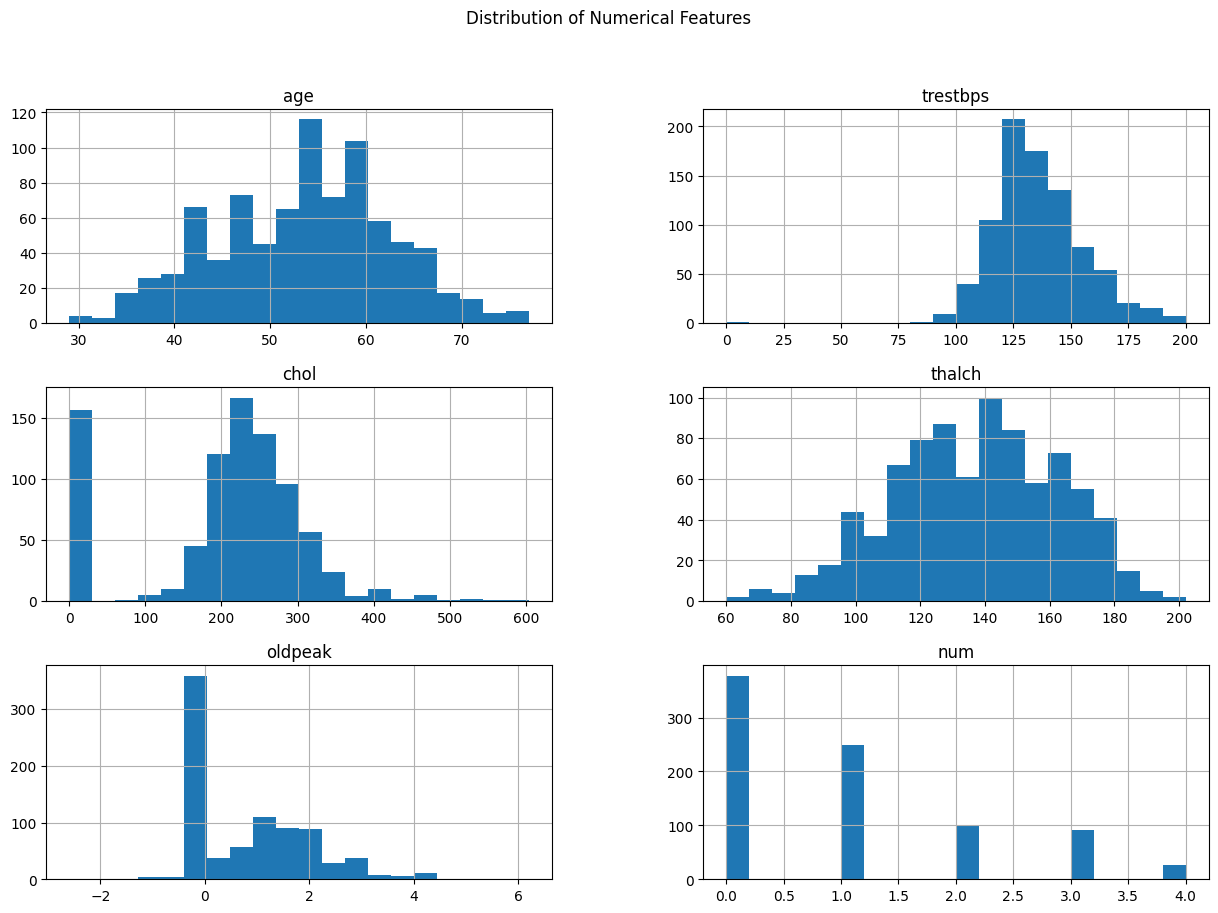

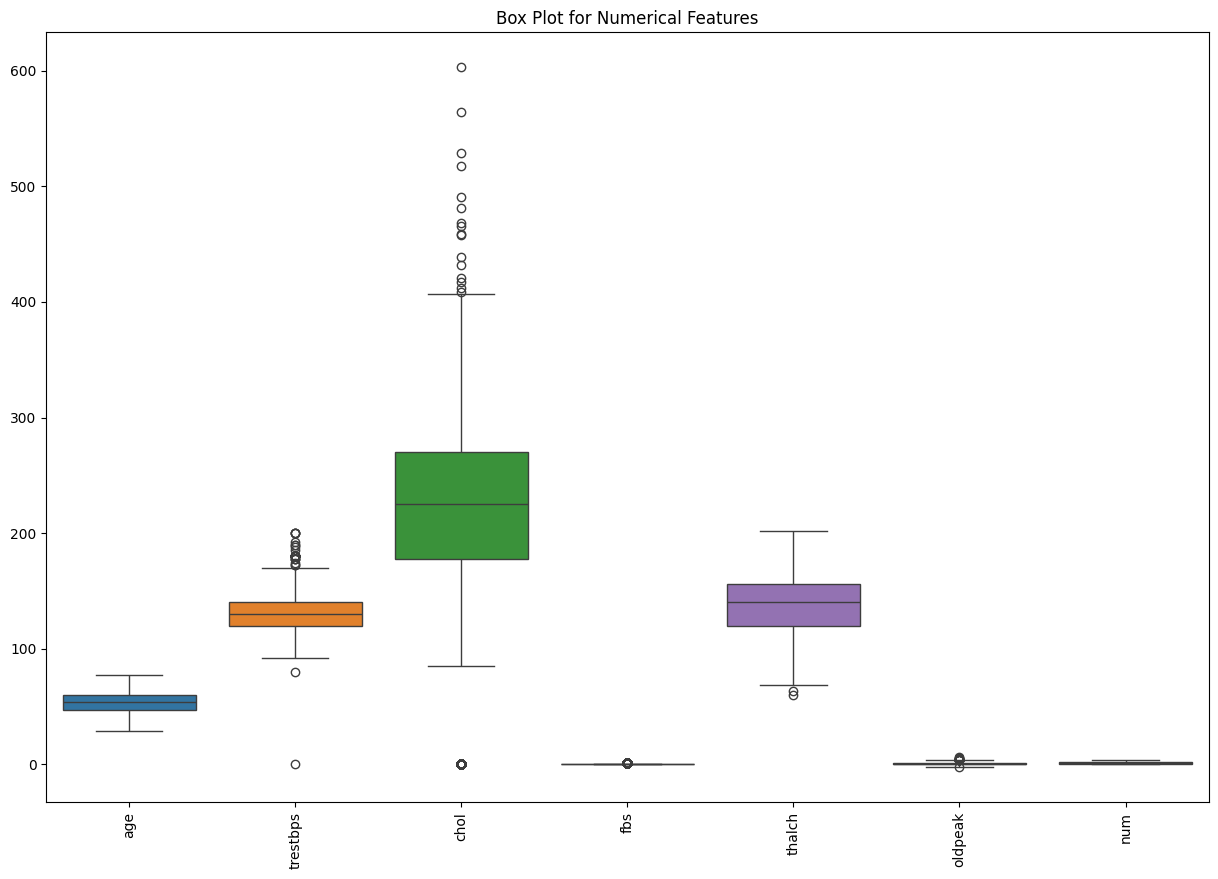


Correlation matrix:
               age  trestbps      chol    thalch   oldpeak       num
age       1.000000  0.244301 -0.107471 -0.345960  0.242662  0.331399
trestbps  0.244301  1.000000  0.100912 -0.109390  0.167131  0.126158
chol     -0.107471  0.100912  1.000000  0.224456  0.029898 -0.256191
thalch   -0.345960 -0.109390  0.224456  1.000000 -0.139598 -0.350331
oldpeak   0.242662  0.167131  0.029898 -0.139598  1.000000  0.437577
num       0.331399  0.126158 -0.256191 -0.350331  0.437577  1.000000


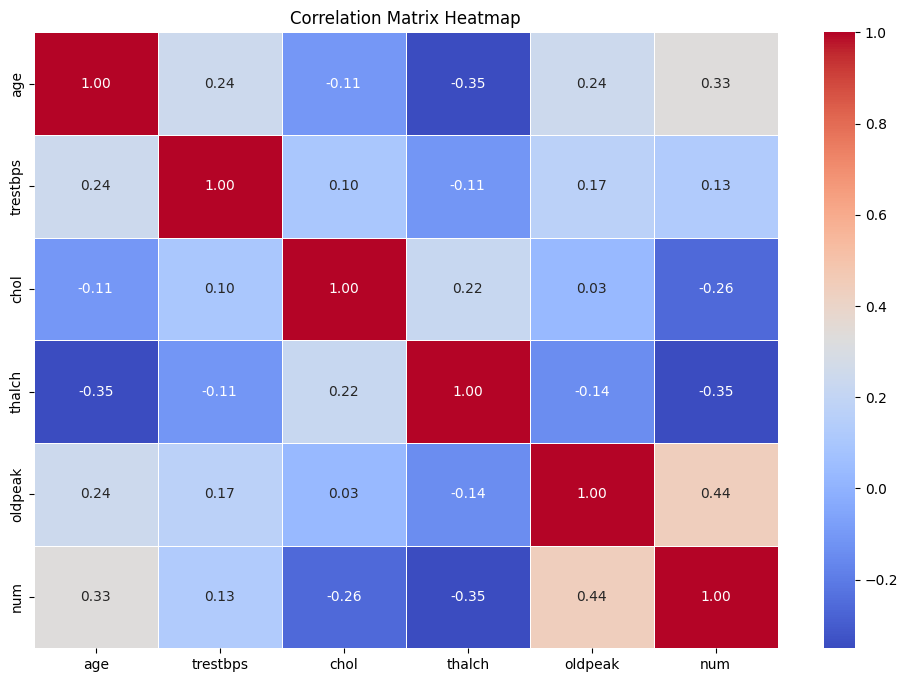


Data after removing outliers based on 'chol' column:
              age    trestbps        chol      thalch     oldpeak         num
count  673.000000  673.000000  673.000000  673.000000  673.000000  673.000000
mean    52.904903  132.980684  243.502229  140.526003    0.918574    0.824666
std      9.135709   17.911769   50.987339   24.612346    1.103659    1.090619
min     29.000000   92.000000   85.000000   71.000000    0.000000    0.000000
25%     46.000000  120.000000  209.000000  122.000000    0.000000    0.000000
50%     54.000000  130.000000  239.000000  142.000000    0.500000    0.000000
75%     59.000000  140.000000  275.000000  160.000000    1.500000    1.000000
max     77.000000  200.000000  407.000000  202.000000    6.200000    4.000000

Scaled DataFrame:
        age  trestbps      chol    thalch   oldpeak       num
0  1.105837  0.671528 -0.206130  0.385215  1.252610 -0.756707
1 -1.304087  0.112821 -0.794949 -0.346669 -0.832918 -0.756707
2  0.448585  0.392174 -1.010850  0.3038

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = r"C:\Users\lenovo\Desktop\Excelr\Data Science\Data Science Projects\Data Science Excel File and Datasets\heart_diseases.xlsx"
df = pd.read_excel(file_path)

# Initial Data Inspection
print("First few rows of the dataset:")
print(df.head())

print("\nColumn names and data types:")
print(df.info())

print("\nSummary statistics of numerical columns:")
print(df.describe(include=[np.number]))

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nUnique values in each column:")
print(df.nunique())

# Data Preprocessing
df.dropna(inplace=True)  # Simple approach: drop rows with missing values

# Categorical Encoding
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])

# If there are other categorical columns, consider encoding them as well
# Example: df = pd.get_dummies(df, drop_first=True)

# Exploratory Data Analysis (EDA)
df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Box Plot for Numerical Features')
plt.xticks(rotation=90)
plt.show()

numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

print("\nCorrelation matrix:")
print(corr_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Outlier Detection and Removal
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[~((df['chol'] < (Q1 - 1.5 * IQR)) | (df['chol'] > (Q3 + 1.5 * IQR)))]

print("\nData after removing outliers based on 'chol' column:")
print(df_filtered.describe())

# Feature Engineering: Scaling
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df_filtered.select_dtypes(include=[np.number])), columns=df_filtered.select_dtypes(include=[np.number]).columns)

print("\nScaled DataFrame:")
print(scaled_df.head())

# Add back categorical features to the scaled DataFrame if needed
scaled_df = pd.concat([scaled_df, df_filtered.select_dtypes(exclude=[np.number])], axis=1)

# Final dataset ready for modeling
print("\nFinal DataFrame after Feature Engineering:")
print(scaled_df.head())

### 4. Decision Tree Classification

We will split the dataset into training and testing sets and implement a Decision Tree Classification model. We will then train the model and evaluate its performance using appropriate metrics.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = "C:\\Users\\lenovo\\Desktop\\Excelr\\Data Science\\Data Science Projects\\Data Science Excel File and Datasets\\heart_diseases.xlsx"
df = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Normalize boolean columns
df['fbs'] = df['fbs'].astype(str).str.lower().map({'true': 1, 'false': 0})
df['exang'] = df['exang'].astype(str).str.lower().map({'true': 1, 'false': 0})

# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope', 'thal'], drop_first=True)

# Define features and target variable
X = df.drop(columns='num')  # Drop the target column to get features
y = df['num']  # Target variable

# Split the dataset into training and testing setsX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  
Accuracy: 0.48
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.68      0.67       122
           1       0.39      0.41      0.40        82
     

### 5. Hyperparameter Tuning

We will perform hyperparameter tuning to optimize the Decision Tree model. This involves experimenting with different hyperparameters such as maximum depth, minimum samples split, and criterion.
### 6. Model Evaluation and Analysis

We will analyze the performance of the Decision Tree model using the evaluation metrics obtained and visualize the decision tree structure to understand the rules learned by the model.


   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Best Score: 0.49763779527559054
Accuracy: 0.5128205128205128


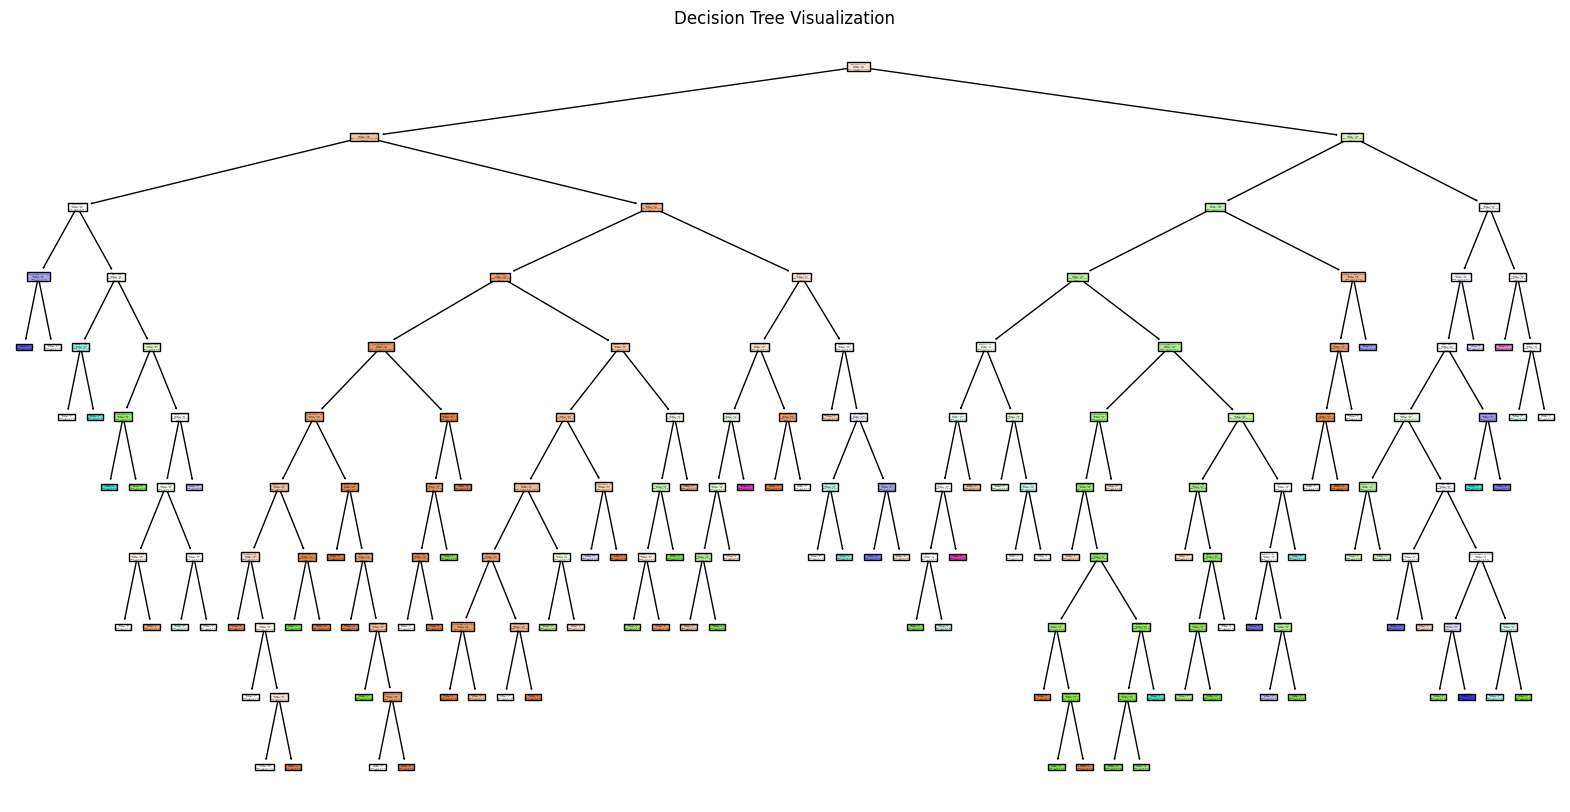

Decision Tree Rules:
|--- exang_True <= 0.50
|   |--- chol <= 42.50
|   |   |--- thalch <= 96.00
|   |   |   |--- thal_reversable defect <= 0.50
|   |   |   |   |--- class: 3
|   |   |   |--- thal_reversable defect >  0.50
|   |   |   |   |--- class: 1
|   |   |--- thalch >  96.00
|   |   |   |--- age <= 52.50
|   |   |   |   |--- oldpeak <= 0.85
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- oldpeak >  0.85
|   |   |   |   |   |--- class: 2
|   |   |   |--- age >  52.50
|   |   |   |   |--- trestbps <= 115.50
|   |   |   |   |   |--- restecg_normal <= 0.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- restecg_normal >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- trestbps >  115.50
|   |   |   |   |   |--- oldpeak <= 3.15
|   |   |   |   |   |   |--- thalch <= 120.50
|   |   |   |   |   |   |   |--- thalch <= 119.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- thalch >  119.00
|   |   |   |   |   |   |   |  

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import tree

# Load the dataset
file_path = "C:\\Users\\lenovo\\Desktop\\Excelr\\Data Science\\Data Science Projects\\Data Science Excel File and Datasets\\heart_diseases.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(data.head())

# Define features and target
X = data.drop(columns=['num'])
y = data['num']

# Encode categorical features
categorical_features = ['sex', 'cp', 'restecg', 'slope', 'thal', 'exang']  # List of categorical columns
X_categorical = X[categorical_features]

# Use one-hot encoding for categorical features
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Use the best estimator from grid search
best_dt = grid_search.best_estimator_

# Make predictions
y_pred = best_dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(best_dt, filled=True, feature_names=X_encoded.columns, class_names=[str(cls) for cls in y.unique()])
plt.title("Decision Tree Visualization")
plt.show()

# Print decision rules
print("Decision Tree Rules:")
tree_rules = export_text(best_dt, feature_names=list(X_encoded.columns))
print(tree_rules)


## Conclusion

In this analysis, we have successfully completed the following tasks:

1. **Data Preparation**:
   - Loaded the dataset into the analysis environment using Pandas and NumPy for efficient data manipulation and analysis.

2. **Exploratory Data Analysis (EDA)**:
   - Conducted a comprehensive EDA to understand the dataset's structure.
   - Identified missing values, outliers, and inconsistencies.
   - Visualized feature distributions through histograms, box plots, and correlation matrices to gain insights into the data.

3. **Feature Engineering**:
   - Applied necessary feature engineering techniques:
     - Encoded categorical variables for model compatibility.
     - Scaled numerical features to ensure uniformity.
     - Handled missing values to maintain data integrity.

4. **Decision Tree Classification**:
   - Split the dataset into training and testing sets using an 80-20 split.
   - Implemented a Decision Tree Classification model with scikit-learn.
   - Trained the model on the training set and evaluated its performance on the testing set using accuracy, precision, recall, F1-score, and ROC-AUC metrics.

5. **Hyperparameter Tuning**:
   - Performed hyperparameter tuning to optimize the Decision Tree model.
   - Experimented with different hyperparameters, such as maximum depth, minimum samples split, and criterion, to enhance model performance.

6. **Model Evaluation and Analysis**:
   - Analyzed the performance of the Decision Tree model based on the evaluation metrics obtained.
   - Visualized the decision tree structure to understand the learned rules and identify important features.

The Decision Tree model demonstrated effective classification performance and provided valuable insights into the data. The model's visualization helped in understanding the decision-making process and highlighted key features influencing the predictions.
